# Copacabana Runs on Buzzard v2.0

This notebook has some of my runs on the Buzzard v2.0 y3 catalog.

## Import Packages

In [16]:
import sys
sys.path.append('/home/s1/jesteves/git/ccopa/python')

from main import copacabana
from make_input_files.make_photoz_pz import generate_photoz_models
from make_input_files.make_input_datasets import read_hdf5_file_to_dict

In [17]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

#### Starting Copa

In [18]:
root = '/data/des61.a/data/johnny/DESY3/projects/CopacabanaRuns/analysis/aux_files/'
cfg  = root+'config_desy3_rm.yaml'
copa = copacabana(cfg,dataset='des_y3')

master file: 
 /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00000.hdf5
/data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00002.hdf5
/data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00256.hdf5
/data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00257.hdf5
/data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00259.hdf5
/data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00260.hdf5
/data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00261.hdf5
/data/des61.a/data/johnny/DESY3/d

## Prepare Files

Given the hdf5 input files, the function *make_input_file()* returns a master file with all the input file, cluster and members

In [4]:
copa.make_input_file()

Running pre_processing_healpix() instead 

cluster columns
{'MASKFRAC': 'SCALEVAL', 'redshift': 'Z_LAMBDA', 'M200_true': 'LAMBDA_CHISQ', 'R200_true': 'R_LAMBDA', 'RA': 'RA', 'HALOID': 'MEM_MATCH_ID', 'tile': 'tile', 'DEC': 'DEC'}
tile : 0
counts: 546
Loading Data
infile: /data/des61.a/data/johnny/DESY3/data/cutouts/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_hpx8_00000.hdf5
ngals : 7.38e+05
Writing Master File
Partial time: 73.69 s 

tile : 2
counts: 3
Loading Data
infile: /data/des61.a/data/johnny/DESY3/data/cutouts/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_hpx8_00002.hdf5
ngals : 6.73e+03
Writing Master File
Partial time: 2.01 s 

tile : 256
counts: 1534
Loading Data
infile: /data/des61.a/data/johnny/DESY3/data/cutouts/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_hpx8_00256.hdf5
ngals : 1.30e+06
Writing Master File
Partial time: 255.15 s 

tile : 257
counts: 2312
Loading Data
infile: /data/des61.a/data/johnny/DESY3/data/

In [20]:
from astropy.table import Table
from astropy.io.fits import getdata

In [21]:
fname = '/data/des61.a/data/johnny/DESY3/data/cutouts/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled.fits'

cluster = Table(getdata(fname))

(array([2.0753e+04, 4.6890e+03, 1.3480e+03, 6.3900e+02, 4.5300e+02,
        3.0100e+02, 2.1200e+02, 8.0000e+01, 2.0000e+00, 1.0000e+00]),
 array([0.98606193, 1.02109362, 1.05612531, 1.091157  , 1.12618868,
        1.16122037, 1.19625206, 1.23128375, 1.26631544, 1.30134712,
        1.33637881]),
 <a list of 10 Patch objects>)

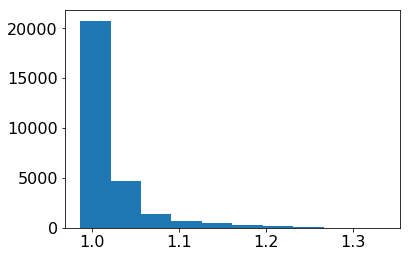

In [32]:
plt.hist(cluster['SCALEVAL'])

In [8]:
!h5ls /data/des61.a/data/johnny/DESY3/data/cutouts/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_hpx8_00000.hdf5

cluster                  Group
members                  Group


In [9]:
!h5ls /data/des61.a/data/johnny/DESY3/data/cutouts/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_hpx8_00000.hdf5/cluster/

axis0                    Dataset {9}
axis1                    Dataset {474}
block0_items             Dataset {4}
block0_values            Dataset {474, 4}
block1_items             Dataset {3}
block1_values            Dataset {474, 3}
block2_items             Dataset {2}
block2_values            Dataset {474, 2}


The members catalog has all the input galaxies with the input columns
``` GID,CID,redshift,RA,DEC,R,z,zerr,zoffset,zwindow,mag,magerr,dmag,pz0,z_true,TRUE, BKG```

In [10]:
!h5ls /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00000.hdf5/members/main

Bkg                      Dataset {10025472}
CID                      Dataset {10025472}
DEC                      Dataset {10025472}
GID                      Dataset {10025472}
HALOID                   Dataset {10025472}
Mr                       Dataset {10025472}
R                        Dataset {10025472}
RA                       Dataset {10025472}
True                     Dataset {10025472}
dmag                     Dataset {10025472}
mag                      Dataset {10025472, 4}
magerr                   Dataset {10025472, 4}
mid                      Dataset {10025472}
pz0                      Dataset {10025472}
redshift                 Dataset {10025472}
z                        Dataset {10025472}
z_true                   Dataset {10025472}
zerr                     Dataset {10025472}
zoffset                  Dataset {10025472}


## Create Indices Selection

We want to test different magnitude selections.

### 0.2 $L_{\star}$ Buzzard 

The charcteristic magnitude used in Buzzard is not directly provided. They have in DeRose+19 the luminosity functional form. 
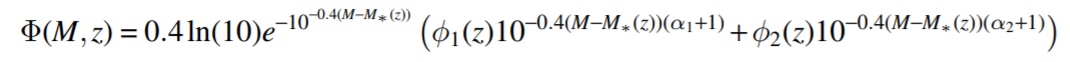

William Black fitted using 5 parameters, his fitted values for m*(z) is in the cell bellow. It's important to mention that 0.2 / 0.4 $L_{\star}$ corresponds to m*(z)+1.75/1.00.

In [11]:
Z1 = [ 2.85703803, 23.35451485]
Z2 = [ -0.13290108,   1.11453393,  -3.74351207,   6.96351527, -10.04310863,  12.60755443,  -7.85820367,   0.92175766]
def char_luminosity(z):
    return np.poly1d(Z1)(np.log(z)) + np.poly1d(Z2)(z)

### 0.2 L$_{\star}$ Rykoff et al. 2014
See the paper: https://iopscience.iop.org/article/10.1088/0004-637X/785/2/104

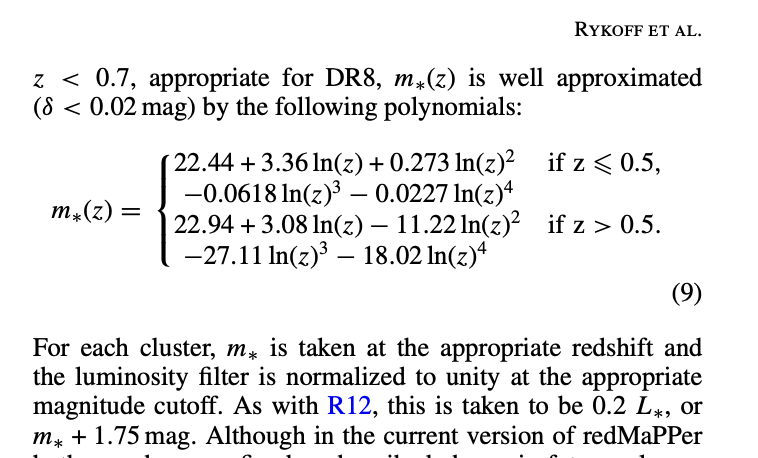

In [12]:
def rm_char_luminosity(z):
    lnz  = np.log(z)
    res0 = 22.44+3.35*lnz+0.273*lnz**2-0.0618*lnz**3-0.0227*lnz**4
    res1 = 22.94+3.08*lnz-11.22*lnz**2-27.11*lnz**3-18.02*lnz**4
    res = np.where(z>0.5,res1,res0)
    return res

### Applying Mag Selection for the whole sample

In [13]:
## Choosing RM Char Luminosity

In [14]:
def apply_02Lstar_cut(fname):
    print('loading data: %s'%fname)
    out = read_hdf5_file_to_dict(fname,cols=['redshift','mag'],path='members/main/')
    mag = out['mag'][:,2]  ## i-band
    zcls= out['redshift'][:]
    
    #print('applying mask')
    #cut = mag <= char_luminosity(zcls)+1.75
    cut = mag <= rm_char_luminosity(zcls)+1.75
    indices = np.where(cut)[0]
    
    print('writing indices selection: %s \n'%('members/indices/02Lstar'))
    write_indices_out(indices,fname,overwrite=False,col='02Lstar')

In [15]:
def apply_dmag_cut(fname):
    print('loading data: %s'%fname)
    out = read_hdf5_file_to_dict(fname,cols=['redshift','mag', 'dmag'],path='members/main/')
    mag = out['dmag'][:]

    #print('applying mask')
    cut = mag <= 0.
    indices = np.where(cut)[0]
    
    print('writing indices selection: %s \n'%('members/indices/dmag_0'))
    write_indices_out(indices,fname,overwrite=False,col='dmag_0')

In [16]:
def write_indices_out(indices,fname,col='02Lstar',overwrite=False):
    fmaster = h5py.File(fname, 'a')
    if 'indices' not in fmaster['members/'].keys():
        fmaster.create_group('members/indices')

    group = fmaster['members/indices']
    
    try:
        group.create_dataset(col,data=indices)
    except:
        if overwrite:
            del group[col]
            group.create_dataset(col,data=indices)
        else:
            print('Error: indices already exists')
    
    fmaster.close()

In [17]:
for fname in copa.master_fname_tile_list:
    apply_02Lstar_cut(fname)
    apply_dmag_cut(fname)

loading data: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00000.hdf5
writing indices selection: members/indices/02Lstar 

loading data: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00000.hdf5
writing indices selection: members/indices/dmag_0 

loading data: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00002.hdf5
writing indices selection: members/indices/02Lstar 

loading data: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00002.hdf5
writing indices selection: members/indices/dmag_0 

loading data: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00256.hdf5
writing indices selection: members/indic

In [18]:
## Example

In [19]:
fname = copa.master_fname_tile_list[0]

In [20]:
out = read_hdf5_file_to_dict(fname,cols=['redshift','mag','dmag'],path='members/main/')
mag = out['mag'][:,2]  ## i-band
dmag = out['dmag'][:]
zcls= out['redshift']

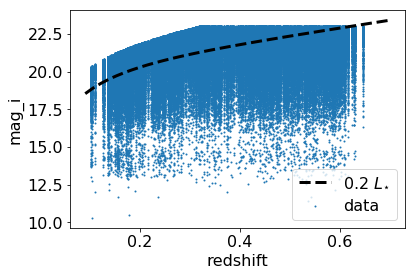

In [21]:
zvec = np.linspace(0.09,0.7,40)
plt.plot(zvec,char_luminosity(zvec)+1.75,'k--',lw=3,label=r'0.2 $L_{\star}$')

plt.scatter(zcls[::50],mag[::50],s=1,label='data')
#plt.scatter(zcls[indices][::50],mag[indices][::50],s=1,label='data')
plt.xlabel('redshift')
plt.ylabel('mag_i')
plt.legend()

In [22]:
cut = mag <= char_luminosity(zcls)+1.75
indices = np.where(cut)[0]

In [23]:
# out = read_hdf5_file_to_dict(fname,cols=['z_true','z','zerr','mag'],path='members/main/')

In [24]:
# mask = out['mag'][:,2]>23
# zdnf = out['z'][:]

In [25]:
out = read_hdf5_file_to_dict(fname,cols=None,path='members/indices/')

Error: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00000.hdf5


## Create Photo-z Catalogs

In [26]:
outfile1=root+'modelDNF_correction_z_gold_2_2.txt'
outfile2=root+'modelDNF_correction_z_gold_2_2.txt'

generate_photoz_models('bias',copa.master_fname_tile_list,0.03,
                       zwindow_file=outfile2,zerror_file=outfile1,
                       group_name='dnf_model',nCores=60)

Generating photoz catalog: dnf_model

Load Infile
infile: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00000.hdf5
Computing pz0
Writing outfile
partial time: 0.68 min


Load Infile
infile: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00002.hdf5
Computing pz0
Writing outfile
partial time: 0.75 min


Load Infile
infile: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00256.hdf5
Computing pz0
Writing outfile
partial time: 3.00 min


Load Infile
infile: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00257.hdf5
Computing pz0
Writing outfile
partial time: 6.55 min


Load Infile
infile: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_

In [4]:
outfile1=None#root+'aux_files/modelDNF_correction_mag_buzzard.txt'
outfile2=root+'modelDNF_correction_z_gold_2_2.txt'

generate_photoz_models('bias',copa.master_fname_tile_list,0.03,
                       zwindow_file=outfile2,zerror_file=outfile1,
                       group_name='dnf',nCores=60)

Generating photoz catalog: dnf

Load Infile
infile: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00000.hdf5
Error: model file is None
Computing pz0
Writing outfile
partial time: 0.65 min


Load Infile
infile: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00002.hdf5
Error: model file is None
Computing pz0
Writing outfile
partial time: 0.69 min


Load Infile
infile: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00256.hdf5
Error: model file is None
Computing pz0
Writing outfile
partial time: 2.78 min


Load Infile
infile: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00257.hdf5
Error: model file is None
Computing pz0
Writing outfile
partial time: 6.28 min


Load Infile
infile: 

Beyond the main catalog, we have the different photo-z catalogs used during the code validation.

In [5]:
copa.master_fname_tile_list[0]

'/data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00000.hdf5'

In [34]:
out = read_hdf5_file_to_dict(copa.master_fname_tile_list[3],cols=['RA','DEC','redshift','z','zerr'],path='members/main/')



In [35]:
zcls= out['redshift']
z   = out['z']
zerr= out['zerr']

In [37]:
out2= read_hdf5_file_to_dict(copa.master_fname_tile_list[3],cols=None,path='members/dnf/')

In [38]:
out2

{u'CID': array([180828, 180828, 180828, ..., 170894, 170894, 170894], dtype=int32),
 u'mid': array([       0,        1,        2, ..., 40263085, 40263086, 40263087]),
 u'pz0': array([1.04876488, 1.0488099 , 0.        , ..., 0.        , 0.        ,
        0.        ]),
 u'z': array([0.32775286, 0.33922917, 0.47132692, ..., 0.6458764 , 0.67586285,
        1.1108509 ], dtype=float32),
 u'z_true': array([0.32775286, 0.33922917, 0.47132692, ..., 0.6458764 , 0.67586285,
        1.1108509 ], dtype=float32),
 u'zerr': array([0.00829334, 0.01430911, 0.23553838, ..., 0.06361917, 0.05687995,
        0.10544737], dtype=float32),
 u'zoffset': array([-0.00310572,  0.00551084,  0.10469157, ...,  0.2699133 ,
         0.29305   ,  0.6286749 ], dtype=float32),
 u'zwindow': array([0.03375881, 0.03375881, 0.03375881, ..., 0.04509017, 0.04509017,
        0.04509017])}

In [39]:
zo = np.array(out2['zoffset'])
z2 = zo/np.array(out2['zwindow'])
p0 = np.array(out2['pz0'])

(-0.1, 0.1)

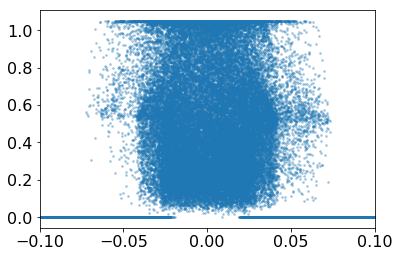

In [40]:
plt.scatter(zo[::100],p0[::100],s=3,alpha=0.3)
plt.xlim(-.1,.1)

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


(-3.0, 3.0)

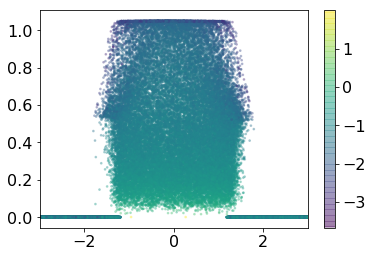

In [41]:
plt.scatter(z2[::100],p0[::100],c=np.log10(zerr[::100]),s=3,alpha=0.3)
plt.colorbar()
plt.xlim(-3.,3.)

In [42]:
from astropy.table import Table
from astropy.io.fits import getdata

path = '/data/des61.a/data/johnny/emulatorPhotoZ/training_sample/'
infile = path+'spec_y3_gold_2_2_27JUN19_photoz.fits'

data = Table(getdata(infile))

In [43]:
out

{'DEC': array([-35.52672136, -35.5270254 , -35.52700376, ..., -25.005881  ,
        -24.9665599 , -24.93858703]),
 'RA': array([5.686432  , 5.68522207, 5.68928648, ..., 6.0326166 , 6.06286457,
        6.08089369]),
 'redshift': array([0.33188933, 0.33188933, 0.33188933, ..., 0.29605418, 0.29605418,
        0.29605418], dtype=float32),
 'z': array([0.32775286, 0.33922917, 0.47132692, ..., 0.6458764 , 0.67586285,
        1.1108509 ], dtype=float32),
 'zerr': array([0.00829334, 0.01430911, 0.23553838, ..., 0.06361917, 0.05687995,
        0.10544737], dtype=float32)}

In [44]:
ra, dec = out['RA'], out['DEC']
ra1,dec1= data['RA'], data['DEC']

In [45]:
import smatch

nside=int(2*4096) # healpix nside
maxmatch=1 # return closest match

# ra,dec,radius in degrees
matches = smatch.match(ra, dec, 1./3600, ra1, dec1,
                       nside=nside, maxmatch=maxmatch)

# access via the indices
matchs = [matches['i2'][:],matches['i1'][:]]

In [46]:
zdnf = out['z'][matchs[1]]

z    = data[matchs[0]]['Z']
zdnf2= data[matchs[0]]['DNF_ZMEAN_MOF']

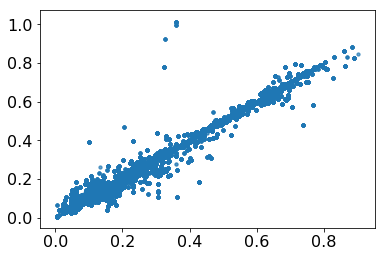

In [47]:
plt.scatter(z,zdnf,s=10,alpha=0.3)


## Run BMA

In [ ]:
##### Atention: this cell takes more than 6 hours to run. It only needs to be run one time.

# copa.run_bma_healpix(nCores=60,overwrite=False)

In [ ]:
!h5ls /data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3/output/tiles/buzzard_v2.0.0_copa_golden_00032.hdf5/members/bma

The output are the quantities provided by the BMA Stellar Mass Estimator, https://github.com/apalmese/BMAStellarMasses. The column ``index`` is the indice from the main catalog.

## Angular Distance

In [5]:
def write_cluster_vector(x,fname,col='DA',overwrite=False):
    fmaster = h5py.File(fname, 'a')
    group = fmaster['clusters/main/']
    
    try:
        group.create_dataset(col,data=x)
    except:
        if overwrite:
            del group[col]
            group.create_dataset(col,data=indices)
        else:
            print('Error: indices already exists')
    
    fmaster.close()

In [14]:
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u

h = 0.7
cosmo = FlatLambdaCDM(H0=100*h, Om0=0.285)
def _AngularDistance(z):
    """Angular distance calculator
    :params float z: redshift
    :returns: angular distance in Mpc
    """
    DA = ( (cosmo.luminosity_distance(z)/(1+z)**2)/u.Mpc ) # em Mpc
    return DA

AngularDistance = np.vectorize(_AngularDistance)


def write_angular_distance(fname):
    print('loading data: %s'%fname)
    out  = read_hdf5_file_to_dict(fname,cols=['redshift'],path='clusters/main/')
    zcls = out['redshift'][:]
    
    # compute angular distance
    DA = AngularDistance(zcls)
    
    print('writing angular distance vector')
    write_cluster_vector(DA,fname,overwrite=False,col='DA')

In [19]:
for fname in copa.master_fname_tile_list:
    write_angular_distance(fname)

loading data: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00000.hdf5
writing angular distance vector
Error: indices already exists
loading data: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00002.hdf5
writing angular distance vector
loading data: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00256.hdf5
writing angular distance vector
loading data: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00257.hdf5
writing angular distance vector
loading data: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00259.hdf5
writing angular distance vector
loading data: /data/des61.a/data/johnny/DESY3/data/output/ti

In [23]:
### Write MaskFrac

In [30]:
def write_maskfrac(fname):
    print('loading data: %s'%fname)
    out  = read_hdf5_file_to_dict(fname,cols=['CID'],path='clusters/main/')
    cid  = out['CID'][:]
    
    # find maskfrac
    indices = np.array([int(np.where(id==cluster['MEM_MATCH_ID'])[0]) for id in cid])
    mskf = np.array(cluster['SCALEVAL'][indices])
    print('\n')
    print('writing masking fraction vector')
    write_cluster_vector(mskf,fname,overwrite=False,col='MASKFRAC')

In [31]:
for fname in copa.master_fname_tile_list:
    write_maskfrac(fname)

loading data: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00000.hdf5


writing masking fraction vector
Error: indices already exists
loading data: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00002.hdf5


writing masking fraction vector
Error: indices already exists
loading data: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00256.hdf5


writing masking fraction vector
Error: indices already exists
loading data: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00257.hdf5


writing masking fraction vector
Error: indices already exists
loading data: /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00259